In [40]:
import pandas as pd
import pickle as pkl
import numpy as np 
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.metrics import confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier

## Import data

In [72]:
fire_data = pd.DataFrame(pd.read_pickle('data/gridmet.pkl'))
fire_data.columns = pd.read_pickle('data/gridmetCols.pkl')
fire_data.info()
fire_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122342 entries, 0 to 122341
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   day                122342 non-null  datetime64[ns]
 1   burning_index_g    122342 non-null  object        
 2   relative_humidity  122342 non-null  object        
 3   air_temperature    122342 non-null  object        
 4   wind_speed         122342 non-null  object        
 5   fire               122342 non-null  object        
dtypes: datetime64[ns](1), object(5)
memory usage: 5.6+ MB


,day,burning_index_g,relative_humidity,air_temperature,wind_speed,fire
0,2017-01-01,0.0,55.100002,273.799988,4.6,0
1,2017-01-01,0.0,43.700001,277.0,4.8,0
2,2017-01-01,0.0,47.799999,276.0,5.1,0
3,2017-01-01,0.0,63.900002,272.100006,5.6,0
4,2017-01-01,0.0,53.299999,273.299988,6.0,0
...,...,...,...,...,...,...
122337,2021-12-31,2.0,53.900002,280.200012,1.4,0
122338,2021-12-31,7.0,54.200001,276.700012,2.2,0
122339,2021-12-31,0.0,47.700001,271.700012,2.9,0
122340,2021-12-31,0.0,59.5,269.399994,3.0,0


In [73]:
fire_data['month'] = pd.DatetimeIndex(fire_data['day']).month
fire_data['date'] = pd.DatetimeIndex(fire_data['day']).day
fire_data['year'] = pd.DatetimeIndex(fire_data['day']).year
fire_data.info()
fire_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122342 entries, 0 to 122341
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   day                122342 non-null  datetime64[ns]
 1   burning_index_g    122342 non-null  object        
 2   relative_humidity  122342 non-null  object        
 3   air_temperature    122342 non-null  object        
 4   wind_speed         122342 non-null  object        
 5   fire               122342 non-null  object        
 6   month              122342 non-null  int64         
 7   date               122342 non-null  int64         
 8   year               122342 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 8.4+ MB


,day,burning_index_g,relative_humidity,air_temperature,wind_speed,fire,month,date,year
0,2017-01-01,0.0,55.100002,273.799988,4.6,0,1,1,2017
1,2017-01-01,0.0,43.700001,277.0,4.8,0,1,1,2017
2,2017-01-01,0.0,47.799999,276.0,5.1,0,1,1,2017
3,2017-01-01,0.0,63.900002,272.100006,5.6,0,1,1,2017
4,2017-01-01,0.0,53.299999,273.299988,6.0,0,1,1,2017


In [74]:
fire_data.isnull().sum()

day                  0
burning_index_g      0
relative_humidity    0
air_temperature      0
wind_speed           0
fire                 0
month                0
date                 0
year                 0
dtype: int64

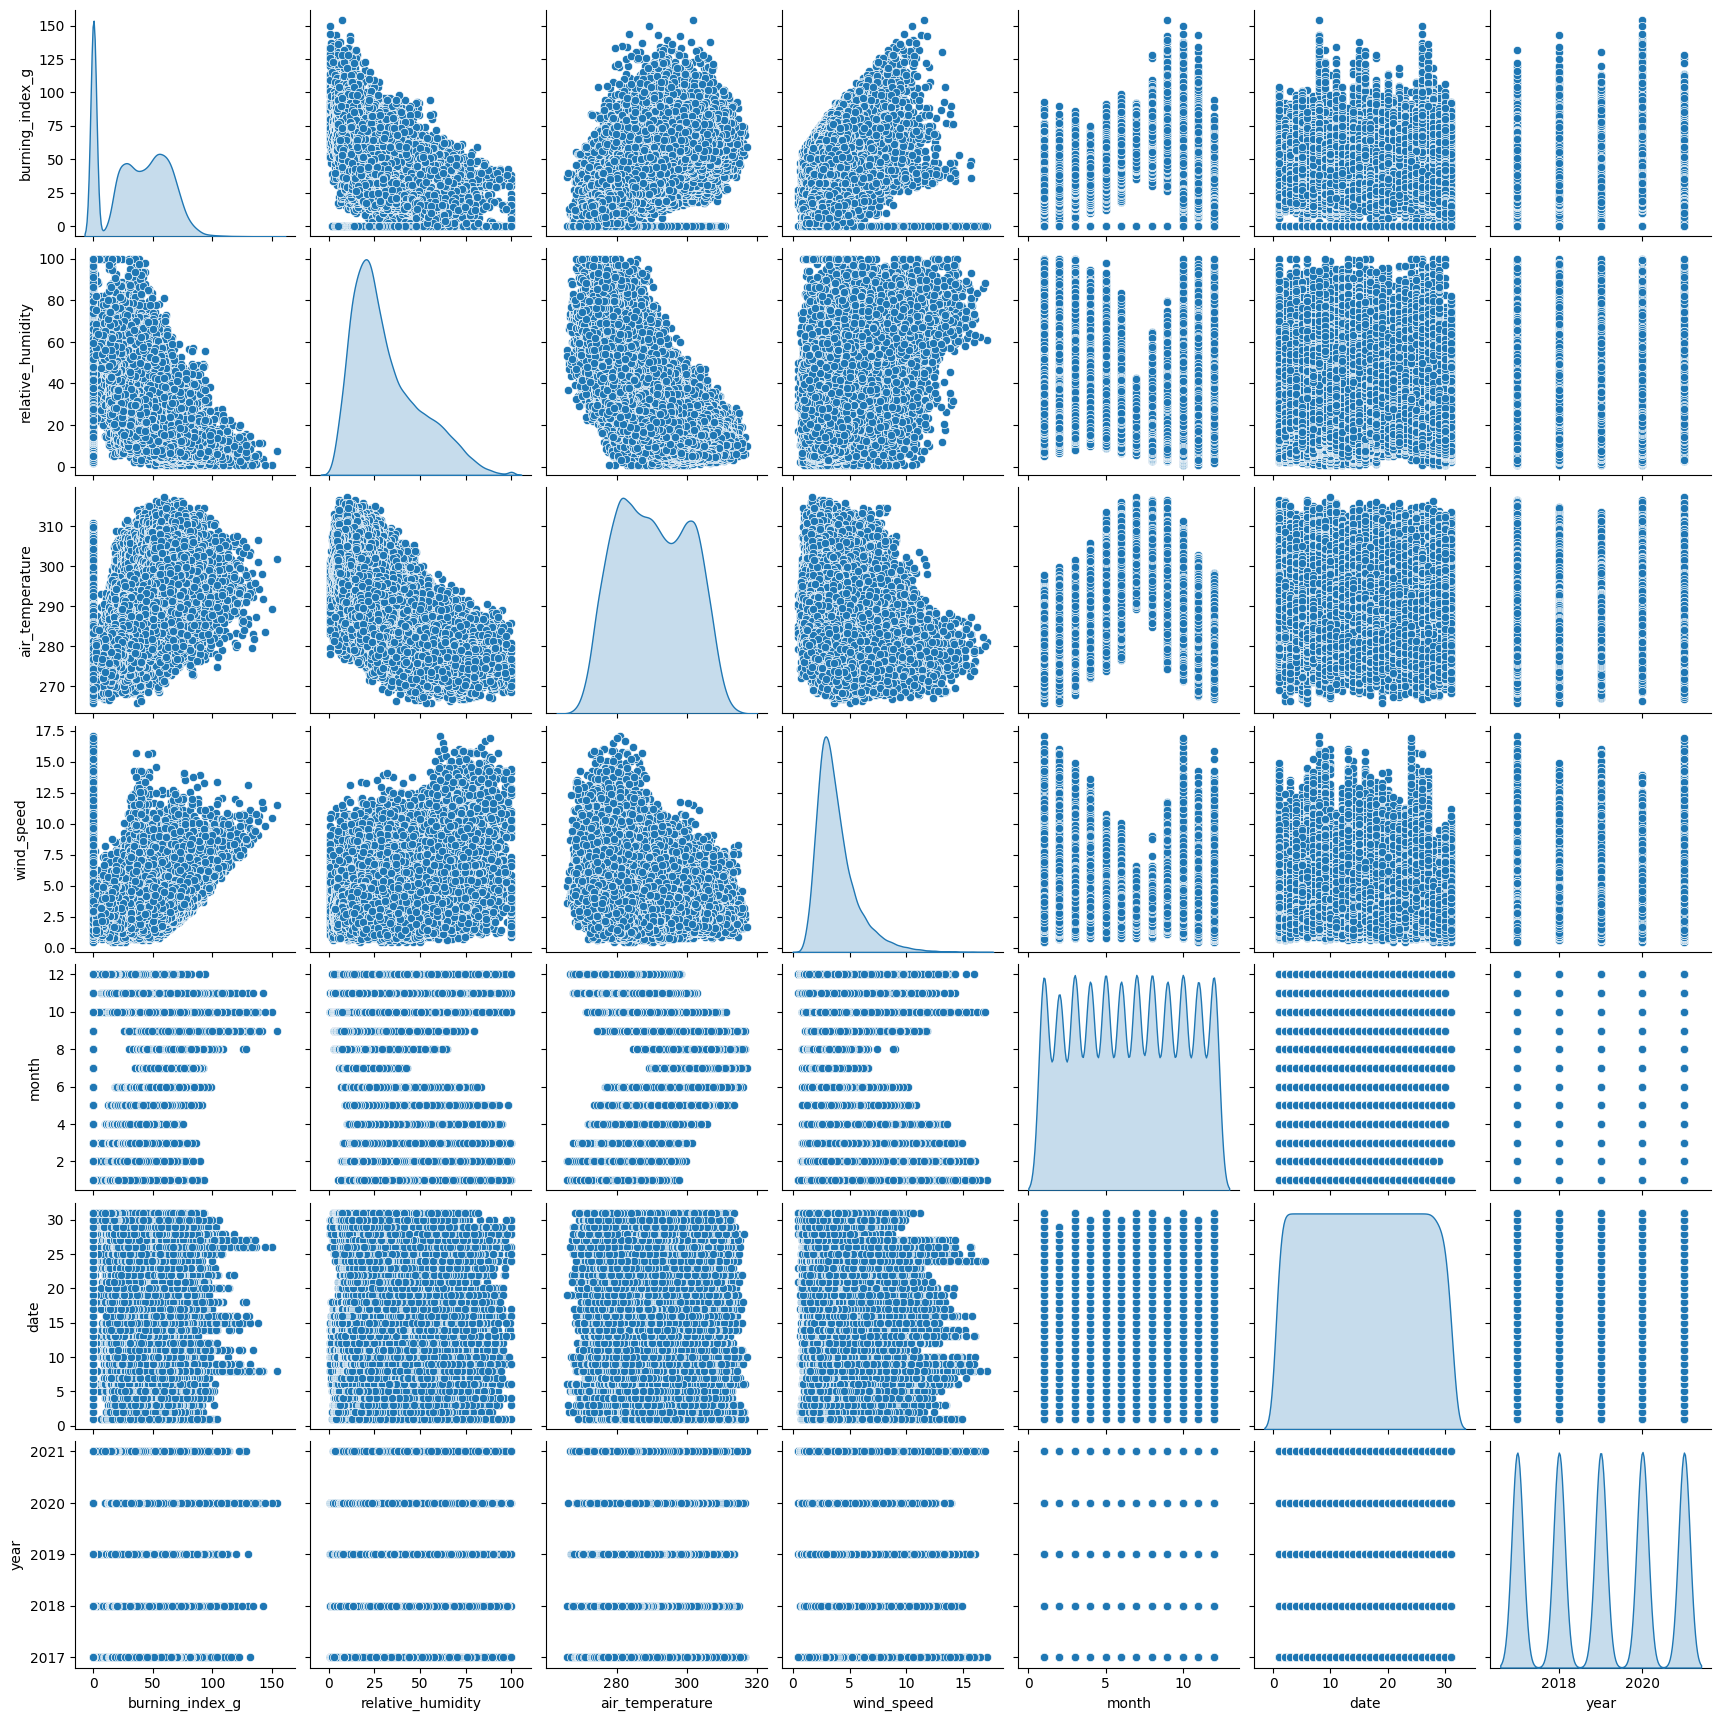

In [90]:
sns.pairplot(fire_data.drop(columns = ['fire'], index=1),diag_kind='kde');

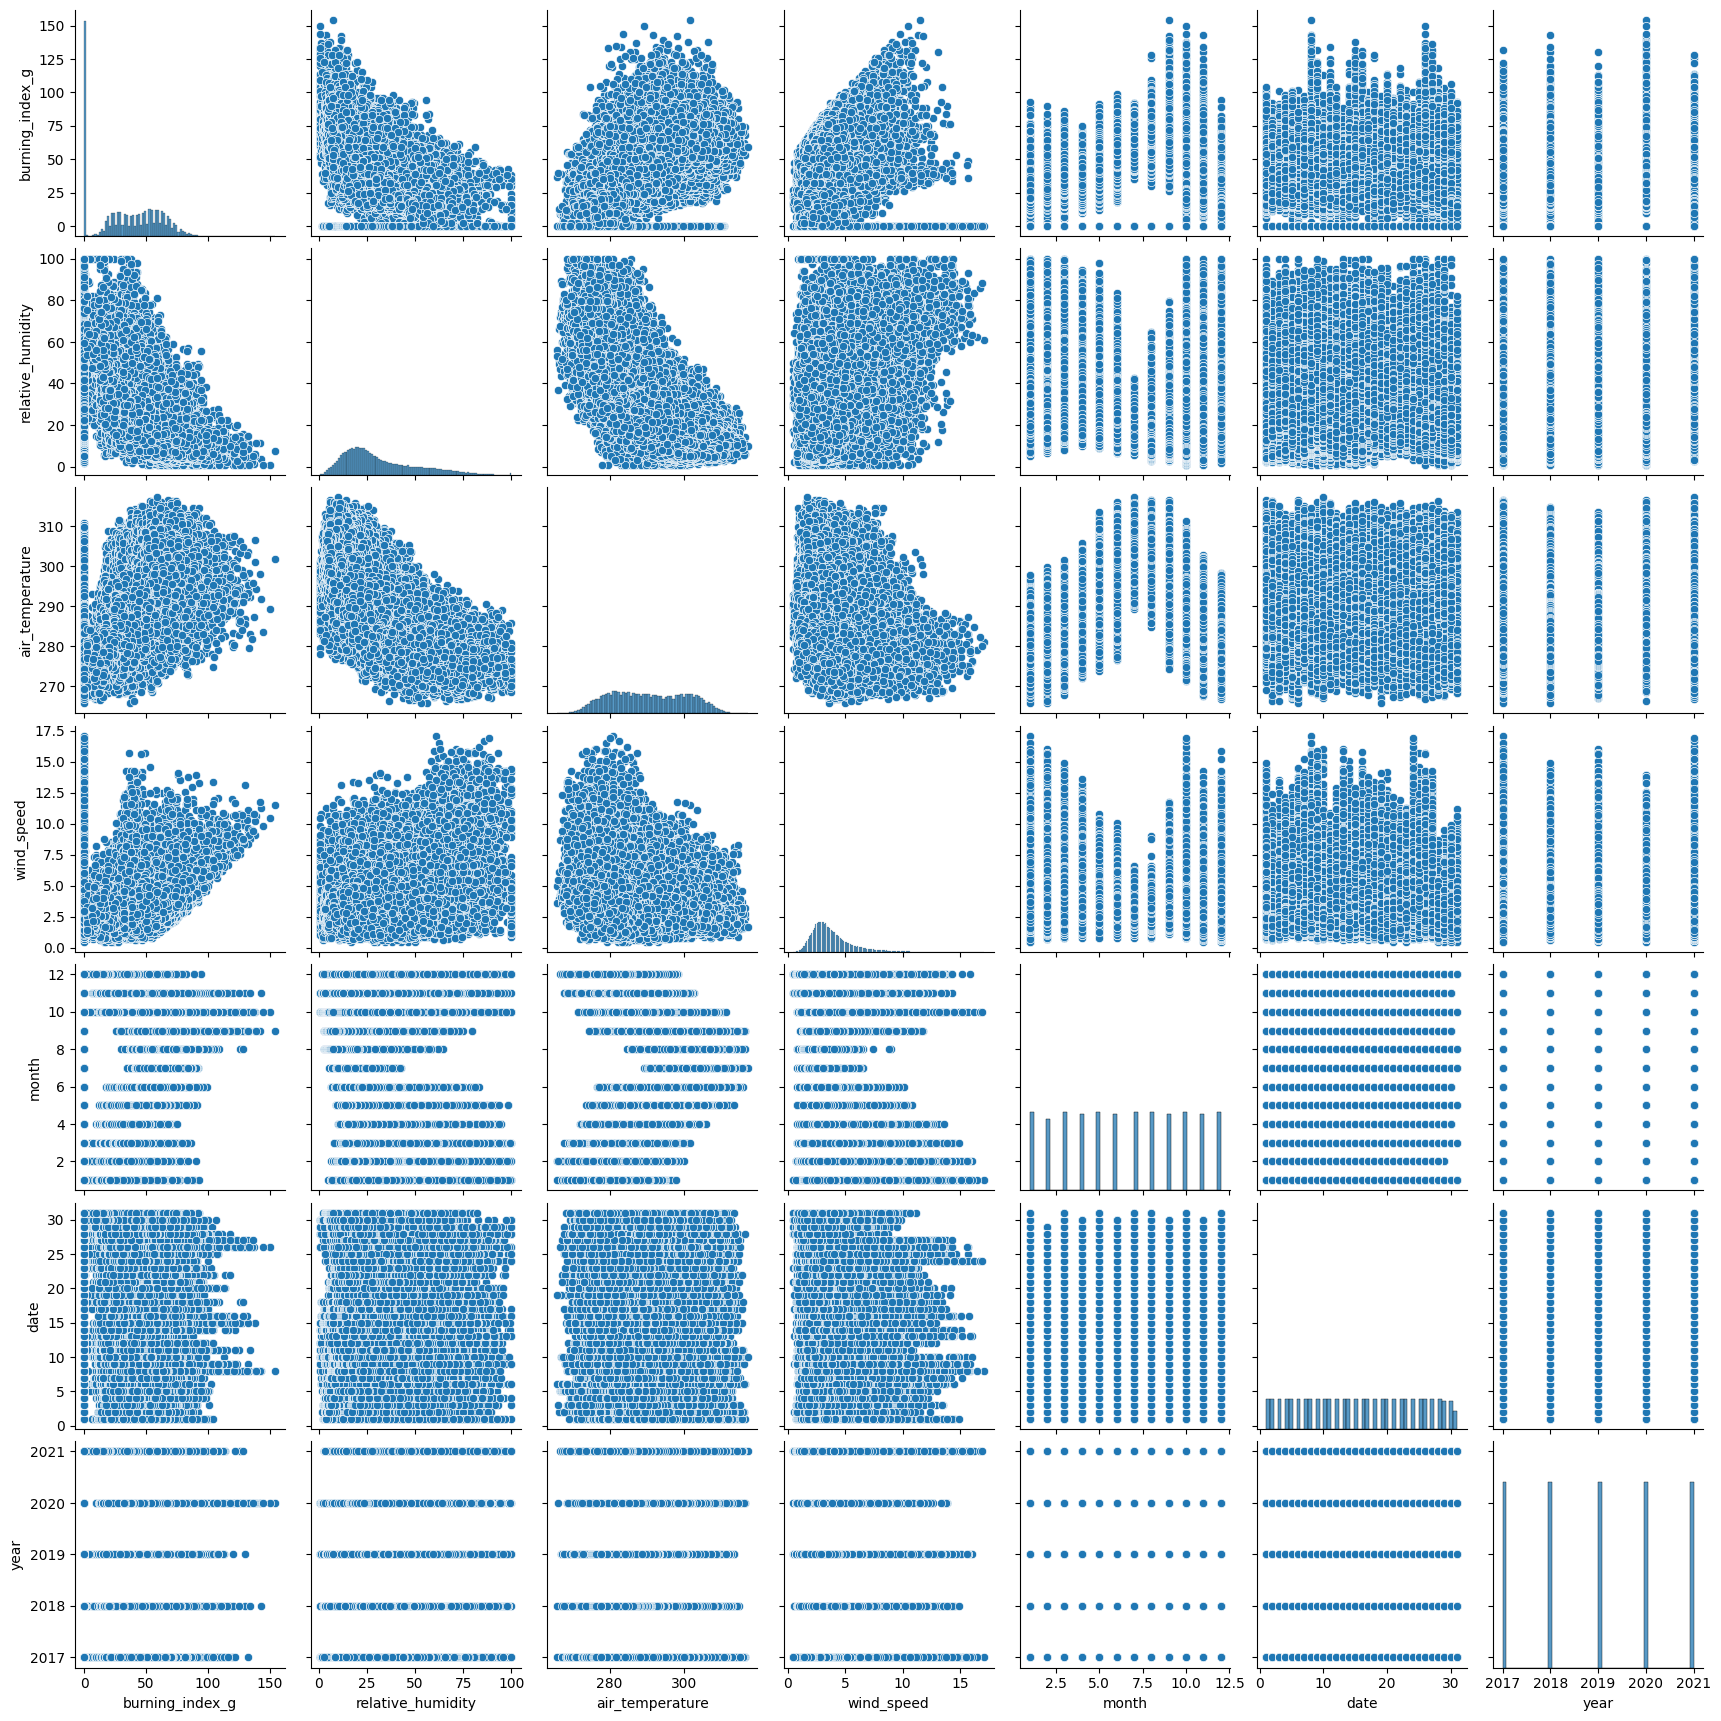

In [89]:
sns.pairplot(fire_data.drop(columns = ['fire'], index=1),diag_kind='hist');

In [77]:
fire_data_int = fire_data.drop(columns = ['fire', 'day'], index=1).apply(pd.to_numeric)
fire_data_int['fire'] = fire_data['fire']
fire_data_int['day'] = fire_data['day']
fire_data_int.info()
fire_data_int.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 122341 entries, 0 to 122341
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   burning_index_g    122341 non-null  float64       
 1   relative_humidity  122341 non-null  float64       
 2   air_temperature    122341 non-null  float64       
 3   wind_speed         122341 non-null  float64       
 4   month              122341 non-null  int64         
 5   date               122341 non-null  int64         
 6   year               122341 non-null  int64         
 7   fire               122341 non-null  object        
 8   day                122341 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 9.3+ MB


,burning_index_g,relative_humidity,air_temperature,wind_speed,month,date,year,fire,day
0,0.0,55.100002,273.799988,4.6,1,1,2017,0,2017-01-01
2,0.0,47.799999,276.000000,5.1,1,1,2017,0,2017-01-01
3,0.0,63.900002,272.100006,5.6,1,1,2017,0,2017-01-01
4,0.0,53.299999,273.299988,6.0,1,1,2017,0,2017-01-01
5,0.0,56.000000,271.299988,5.8,1,1,2017,0,2017-01-01


### Split into train and test

In [78]:
y = fire_data_int['fire']
X = fire_data_int.drop(columns = ['fire'])
X.shape, y.shape

((122341, 8), (122341,))

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85638, 8), (36703, 8), (85638,), (36703,))

In [80]:
fire_data_int[fire_data_int.fire == 0]

,burning_index_g,relative_humidity,air_temperature,wind_speed,month,date,year,fire,day
0,0.0,55.100002,273.799988,4.6,1,1,2017,0,2017-01-01
2,0.0,47.799999,276.000000,5.1,1,1,2017,0,2017-01-01
3,0.0,63.900002,272.100006,5.6,1,1,2017,0,2017-01-01
4,0.0,53.299999,273.299988,6.0,1,1,2017,0,2017-01-01
5,0.0,56.000000,271.299988,5.8,1,1,2017,0,2017-01-01
...,...,...,...,...,...,...,...,...,...
122337,2.0,53.900002,280.200012,1.4,12,31,2021,0,2021-12-31
122338,7.0,54.200001,276.700012,2.2,12,31,2021,0,2021-12-31
122339,0.0,47.700001,271.700012,2.9,12,31,2021,0,2021-12-31
122340,0.0,59.500000,269.399994,3.0,12,31,2021,0,2021-12-31


In [81]:
fire_data_int[fire_data_int.fire == 1]

,burning_index_g,relative_humidity,air_temperature,wind_speed,month,date,year,fire,day
6164,25.0,18.800001,290.200012,3.7,4,3,2017,1,2017-04-03
6165,26.0,19.400000,288.399994,3.4,4,3,2017,1,2017-04-03
6166,32.0,17.100000,288.299988,3.5,4,3,2017,1,2017-04-03
6167,29.0,18.900000,285.600006,2.6,4,3,2017,1,2017-04-03
6168,29.0,17.000000,286.500000,2.4,4,3,2017,1,2017-04-03
...,...,...,...,...,...,...,...,...,...
109804,67.0,14.600000,307.799988,3.8,6,27,2021,1,2021-06-27
109805,67.0,14.800000,305.500000,3.7,6,27,2021,1,2021-06-27
109806,60.0,17.400000,311.299988,2.4,6,27,2021,1,2021-06-27
109807,57.0,16.900000,310.799988,2.1,6,27,2021,1,2021-06-27


In [82]:
fire_data_int[fire_data_int.fire == 2]

,burning_index_g,relative_humidity,air_temperature,wind_speed,month,date,year,fire,day
10385,35.0,22.900000,300.200012,2.7,6,5,2017,2,2017-06-05
10386,36.0,20.400000,300.600006,2.7,6,5,2017,2,2017-06-05
10387,45.0,17.700001,300.700012,2.9,6,5,2017,2,2017-06-05
10388,44.0,19.700001,297.799988,3.0,6,5,2017,2,2017-06-05
10389,47.0,16.300001,299.500000,3.3,6,5,2017,2,2017-06-05
...,...,...,...,...,...,...,...,...,...
118045,16.0,96.000000,274.500000,3.3,10,28,2021,2,2021-10-28
118046,19.0,92.700005,274.500000,3.2,10,28,2021,2,2021-10-28
118047,15.0,100.000000,275.399994,1.5,10,28,2021,2,2021-10-28
118048,13.0,100.000000,276.200012,1.4,10,28,2021,2,2021-10-28


In [83]:
len(fire_data_int[fire_data_int.fire == 0]), len(fire_data_int[fire_data_int.fire == 1]), len(fire_data_int[fire_data_int.fire == 2])



(72781, 1736, 47824)

In [84]:
fire_data_int

,burning_index_g,relative_humidity,air_temperature,wind_speed,month,date,year,fire,day
0,0.0,55.100002,273.799988,4.6,1,1,2017,0,2017-01-01
2,0.0,47.799999,276.000000,5.1,1,1,2017,0,2017-01-01
3,0.0,63.900002,272.100006,5.6,1,1,2017,0,2017-01-01
4,0.0,53.299999,273.299988,6.0,1,1,2017,0,2017-01-01
5,0.0,56.000000,271.299988,5.8,1,1,2017,0,2017-01-01
...,...,...,...,...,...,...,...,...,...
122337,2.0,53.900002,280.200012,1.4,12,31,2021,0,2021-12-31
122338,7.0,54.200001,276.700012,2.2,12,31,2021,0,2021-12-31
122339,0.0,47.700001,271.700012,2.9,12,31,2021,0,2021-12-31
122340,0.0,59.500000,269.399994,3.0,12,31,2021,0,2021-12-31


In [88]:
season_dict = {1: 'Winter',
               2: 'Winter',
               3: 'Spring', 
               4: 'Spring',
               5: 'Spring',
               6: 'Summer',
               7: 'Summer',
               8: 'Summer',
               9: 'Fall',
               10: 'Fall',
               11: 'Fall',
               12: 'Winter'}
fire_data_season = fire_data_int.copy()
fire_data_season['season'] = fire_data_season['month'].apply(lambda x: season_dict[x])
fire_data_season = pd.get_dummies(fire_data_season, columns=['season'])
fire_data_season

,burning_index_g,relative_humidity,air_temperature,wind_speed,month,date,year,fire,day,season_Fall,season_Spring,season_Summer,season_Winter
0,0.0,55.100002,273.799988,4.6,1,1,2017,0,2017-01-01,0,0,0,1
2,0.0,47.799999,276.000000,5.1,1,1,2017,0,2017-01-01,0,0,0,1
3,0.0,63.900002,272.100006,5.6,1,1,2017,0,2017-01-01,0,0,0,1
4,0.0,53.299999,273.299988,6.0,1,1,2017,0,2017-01-01,0,0,0,1
5,0.0,56.000000,271.299988,5.8,1,1,2017,0,2017-01-01,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
122337,2.0,53.900002,280.200012,1.4,12,31,2021,0,2021-12-31,0,0,0,1
122338,7.0,54.200001,276.700012,2.2,12,31,2021,0,2021-12-31,0,0,0,1
122339,0.0,47.700001,271.700012,2.9,12,31,2021,0,2021-12-31,0,0,0,1
122340,0.0,59.500000,269.399994,3.0,12,31,2021,0,2021-12-31,0,0,0,1


# Models

First, we can check the VIFs of our variables. They are all below 5, which is great! 

In [14]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# The dataframe passed to VIF must include the intercept term. We add it the same way we did before.
#first argument: training dataset
#second argument: columns of independent variables as a list that we want to look through
def VIF(df, columns):
    values = sm.add_constant(df[columns]).values
    num_columns = len(columns)+1
    vif = [variance_inflation_factor(values, i) for i in range(num_columns)]
    return pd.Series(vif[1:], index=columns)

cols = ['burning_index_g', 'relative_humidity', 'air_temperature',
       'wind_speed', 'month', 'date', 'year']
VIF(X_train, cols)

burning_index_g      3.096022
relative_humidity    3.319631
air_temperature      2.473131
wind_speed           1.348960
month                1.120486
date                 1.000992
year                 1.015225
dtype: float64

In [15]:
y = fire_data_int['fire']
X = fire_data_int.drop(columns = ['fire', 'day'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((85638, 7), (36703, 7), (85638,), (36703,))

In [16]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')
y_train

68830     2
29548     0
2277      0
20662     2
37484     2
         ..
56213     0
90475     2
2482      0
36816     0
104737    0
Name: fire, Length: 85638, dtype: int64

In [42]:
def scores(y_test, y_pred):
    cm  = confusion_matrix(y_test, y_pred)
    acc = accuracy_score(y_test, y_pred)
    TPR = cm[1][1] / sum(cm[1])            # TP/(TP+FP)
    FPR = cm[0][1] / sum(cm[0])            # FP/(FP+TN)
    PRE = cm[1][1] / (cm[0][1] + cm[1][1]) # TP/(TP+FP)
    print('Accuracy: ', acc)
    print('True Positive Rate (TPR): ', TPR)
    print('False Positive Rate (FPR): ', FPR)
    print('Precision: ', PRE)
    fin_arr = [acc, TPR, FPR, PRE]
    return fin_arr

In [ ]:
#Without cross validation 
dtc = DecisionTreeClassifier(random_state=88)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cart_accuracy = accuracy_score(y_test, y_pred)
scores(y_test, y_pred)

## CART

In [34]:
#Without cross validation 
dtc = DecisionTreeClassifier(random_state=88)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
cart_accuracy = accuracy_score(y_test, y_pred)
scores(y_test, y_pred)

Accuracy:  0.8722447756314198
True Positive Rate (TPR):  0.8235294117647058
False Positive Rate (FPR):  0.004175269557237899
Precision:  0.8115942028985508


In [36]:
#With cross validation 
grid_values = {'ccp_alpha': np.linspace(0, 0.01, 210)}

dtc = DecisionTreeClassifier(random_state=88)

dtc_cv = GridSearchCV(dtc, param_grid = grid_values, scoring = 'accuracy', cv=10) 
dtc_cv.fit(X_train, y_train)
y_pred = dtc_cv.predict(X_test)
cart_accuracy = accuracy_score(y_test, y_pred)

cart_best_ccp_alpha = dtc_cv.best_params_['ccp_alpha']
print(f'Best ccp_alpha: {cart_best_ccp_alpha:.4f}')
print(f'CART Test Accuracy: {cart_accuracy:.4f}')
scores(y_test, y_pred)

Best ccp_alpha: 0.0000
CART Test Accuracy: 0.9163
Accuracy:  0.9162738740702395
True Positive Rate (TPR):  0.8739495798319328
False Positive Rate (FPR):  0.0038999770589584768
Precision:  0.8303393213572854


## Random Forest

In [32]:
#Without cross validation 
rf = RandomForestClassifier(random_state=88)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

rf_accuracy = accuracy_score(y_test, y_pred)
scores(y_test, y_pred)

Accuracy:  0.9156472222979049
True Positive Rate (TPR):  0.6638655462184874
False Positive Rate (FPR):  0.0026611608167010784
Precision:  0.8449197860962567


In [35]:
#With cross validation 

grid_values = {'max_features': np.linspace(1,10,10, dtype='int32')}

rf = RandomForestClassifier(random_state=88)

rf_cv = GridSearchCV(rf, param_grid=grid_values, scoring='accuracy', cv=10,verbose=0)
rf_cv.fit(X_train, y_train)

y_pred = rf_cv.predict(X_test)

rf_max_features = rf_cv.best_params_['max_features']
rf_accuracy = accuracy_score(y_test, y_pred) 
scores(y_test, y_pred)

Accuracy:  0.9181538293872435
True Positive Rate (TPR):  0.8634453781512605
False Positive Rate (FPR):  0.0032576278963064925
Precision:  0.8526970954356846


## LDA

In [37]:
lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

lda_accuracy = accuracy_score(y_test, y_pred)
scores(y_test, y_pred)

Accuracy:  0.7687382502792687
True Positive Rate (TPR):  0.0
False Positive Rate (FPR):  0.0
Precision:  nan


/var/folders/hv/cfm4_gf556n9ml82k70gl67m0000gn/T/ipykernel_81756/3514473080.py:6: RuntimeWarning: invalid value encountered in long_scalars
  PRE = cm[1][1] / (cm[0][1] + cm[1][1]) # TP/(TP+FP)


## Vanilla Bagging

In [38]:
total_features = len(X_train.columns)

bagging = RandomForestClassifier(max_features = total_features, random_state=88)
# Note: you can change the verbose parameter to control how much training progress is printed.
bagging.fit(X_train, y_train)

y_pred = bagging.predict(X_test)

bagging_accuracy = accuracy_score(y_test, y_pred) 
print(f'No CV Random Forest Test Accuracy: {bagging_accuracy:.4f}')
scores(y_test, y_pred)

No CV Random Forest Test Accuracy: 0.9166
Accuracy:  0.9165735770917909
True Positive Rate (TPR):  0.8634453781512605
False Positive Rate (FPR):  0.0032576278963064925
Precision:  0.8526970954356846


## Gradient Boosting Classifier

In [41]:
gbc = GradientBoostingClassifier(n_estimators=3300, max_leaf_nodes=10, random_state=88) 

gbc.fit(X_train, y_train)

y_pred = gbc.predict(X_test)

gbc_accuracy = accuracy_score(y_test, y_pred) 
print(f'GBC Test Accuracy: {gbc_accuracy:.4f}')
scores(y_test, y_pred)

GBC Test Accuracy: 0.9115
Accuracy:  0.9115058714546495
True Positive Rate (TPR):  0.8508403361344538
False Positive Rate (FPR):  0.0033035099793530627
Precision:  0.8490566037735849


## Comparison table

In [ ]:
#Create Comparison Table
#These lines are provided for you to help construct a comparison table.
#It is not requred to follow this format. + You need to find ACC, TPR, FPR, PRE for each model that you choose.
comparison_data = {'Baseline':[baseline_acc,baseline_TPR,baseline_FPR, baseline_PRE],
                   'Logistic Regression':[log_acc,log_TPR,log_FPR, log_PRE],
                   'Decision Tree Classifier':[dtc_acc,dtc_TPR,dtc_FPR,dtc_PRE],
                   'Random Forest with CV':[rf_acc,rf_TPR, rf_FPR,rf_PRE],
                  'Linear Discriminant Analysis':[lda_acc,lda_TPR, lda_FPR,lda_PRE]}

comparison_table = pd.DataFrame(data=comparison_data, index=['Accuracy', 'TPR', 'FPR','PRE']).transpose()
comparison_table.style.set_properties(**{'font-size': '12pt',}).set_table_styles([{'selector': 'th', 'props': [('font-size', '10pt')]}])
comparison_table